<a href="https://colab.research.google.com/github/manasviKnarula/104-project/blob/main/data_story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import statistics
import plotly.express as px
import csv
import plotly.graph_objects as pg

Lets start by getting our data file


In [2]:
from google.colab import files
data_to_load = files.upload()


Saving FemalesData.csv to FemalesData.csv


Now, we will plot the data on a scatter plot, on the y axis is female data and on x axis is the amount saved

In [7]:
df = pd.read_csv('FemalesData.csv')
fig = px.scatter(df, y = 'quant_saved', color = 'female')
fig.show()

In [8]:
import csv

with open('FemalesData.csv', newline="") as f:
  reader = csv.reader(f)
  female_data = list(reader)

female_data.pop(0)

#Finding total number of people and number of people who were reminded
total_entries = len(female_data)
total_females = 0
for data in female_data:
  if int(data[1]) == 1:
    total_females += 1

import plotly.graph_objects as go

fig = go.Figure(go.Bar(x=["female", "not female"], y=[total_females, (total_entries - total_females)]))

fig.show()

In [9]:
all_savings = []
for data in female_data:
  all_savings.append(float(data[0]))

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")

Mean of savings - 85.32780331328739
Median of savings - 39.2724
Mode of savings - 0.0


The mean and median have a huge difference meaning there are some outliers in our data to make sure we will sample the data, we will do 2 samplings and find their mean median and mode

In [10]:
females = []
not_females = []

In [11]:
for data in female_data:
  if int(data[1]) == 1:
    females.append(float(data[0]))
  else:
    not_females.append(float(data[0]))

In [12]:
print("Results for people who were females")
print(f"Mean of savings - {statistics.mean(females)}")
print(f"Median of savings - {statistics.median(females)}")
print(f"Mode of savings - {statistics.mode(females)}")
#To add new lines
print("\n\n")
print("Results for people who were not females")
print(f"Mean of savings - {statistics.mean(not_females)}")
print(f"Median of savings - {statistics.median(not_females)}")
print(f"Mode of savings - {statistics.mode(not_females)}")

Results for people who were females
Mean of savings - 80.0998678893177
Median of savings - 39.2724
Mode of savings - 0.0



Results for people who were not females
Mean of savings - 94.48225870875959
Median of savings - 39.2724
Mode of savings - 0.0


In [13]:
print(f"Standard deviation of all the data -> {statistics.stdev(all_savings)}")
print(f"Standard deviation of people who were females -> {statistics.stdev(females)}")
print(f"Standard deviation of people who were not females -> {statistics.stdev(not_females)}")

Standard deviation of all the data -> 196.75453011909315
Standard deviation of people who were females -> 183.70373742366775
Standard deviation of people who were not females -> 217.44838443764846


In [16]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

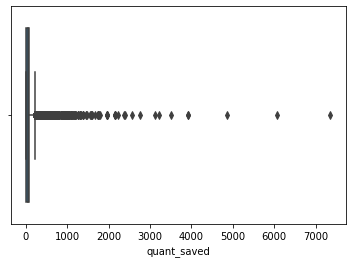

In [17]:
import seaborn as sns

sns.boxplot(data=df, x=df["quant_saved"])

In [18]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3-q1

print(f"Q1 - {q1}")
print(f"Q3 - {q3}")
print(f"IQR - {iqr}")

lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

print(f"Lower Whisker - {lower_whisker}")
print(f"Upper Whisker - {upper_whisker}")

#Creating a new DataFrame
new_df = df[df["quant_saved"] < upper_whisker]

Q1 - 2.2840000000000003
Q3 - 86.514
IQR - 84.22999999999999
Lower Whisker - -124.06099999999998
Upper Whisker - 212.85899999999998


In [19]:
#Mean, median and mode of savings
all_savings = new_df["quant_saved"].tolist()

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")
print(f"Standard deviation in savings - {statistics.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

Mean of savings - 46.200519389818794
Median of savings - 36.0475
Mode of savings - 0.0
Standard deviation in savings - 50.866871917288634


In [20]:
#Collecting 1000 samples of 100 data points each, saving their averages in a list
import random

sampling_mean_list = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list)

fig = ff.create_distplot([sampling_mean_list], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

In [21]:
print(f"Standard deviation of the sampling data - {statistics.stdev(sampling_mean_list)}")

Standard deviation of the sampling data - 4.807821119093487


In [22]:
print(f"Mean of Population - {statistics.mean(all_savings)}")
print(f"Mean of Sampling Distribution - {mean_sampling}")

Mean of Population - 46.200519389818794
Mean of Sampling Distribution - 46.15396350941941


In [23]:
females_df = new_df.loc[new_df["female"] == 1]
not_females_df = new_df.loc[new_df["female"] == 0]

print(females_df.head())
print(not_females_df.head())

   quant_saved  female  highschool_completed  wealthy
0      13.0908       1                     0        0
3      58.9086       1                     1        1
4      78.5448       1                     1        1
5      39.2724       1                     1        1
6      32.7270       1                     1        1
    quant_saved  female  highschool_completed  wealthy
1     39.272400       0                     1        1
8      2.284000       0                     1        1
10    58.908600       0                     1        1
17     2.284000       0                     1        1
28    47.178078       0                     0        0


In [24]:
fig = ff.create_distplot([not_females_df["quant_saved"].tolist()], ["Savings (Not females)"], show_hist=False)
fig.show()

In [25]:
not_females_savings = not_females_df["quant_saved"].tolist()

sampling_mean_list_not_females = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(not_females_savings))
  sampling_mean_list_not_females.append(statistics.mean(temp_list))

mean_sampling_not_females = statistics.mean(sampling_mean_list_not_females)
stdev_sampling_not_females = statistics.stdev(sampling_mean_list_not_females)

print(f"Mean of Sampling (Not females) -> {mean_sampling_not_females}")
print(f"Standard Deviation of Sampling (Not females) -> {stdev_sampling_not_females}")
fig = ff.create_distplot([sampling_mean_list_not_females], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Not females) -> 47.47721793664919
Standard Deviation of Sampling (Not females) -> 5.501632535843323


In [26]:
first_std_deviation_start = mean_sampling_not_females-stdev_sampling_not_females
first_std_deviation_end = mean_sampling_not_females+stdev_sampling_not_females
print(f"First (start) - {first_std_deviation_start} and First (end) - {first_std_deviation_end}")

second_std_deviation_start = mean_sampling_not_females-(2*stdev_sampling_not_females)
second_std_deviation_end = mean_sampling_not_females+(2*stdev_sampling_not_females)
print(f"Second (start) - {second_std_deviation_start} and Second (end) - {second_std_deviation_end}")

third_std_deviation_start = mean_sampling_not_females-(3*stdev_sampling_not_females)
third_std_deviation_end = mean_sampling_not_females+(3*stdev_sampling_not_females)
print(f"Third (start) - {third_std_deviation_start} and Third (end) - {third_std_deviation_end}")

First (start) - 41.97558540080587 and First (end) - 52.97885047249251
Second (start) - 36.47395286496254 and Second (end) - 58.48048300833584
Third (start) - 30.97232032911922 and Third (end) - 63.98211554417916


In [27]:
females_savings = females_df["quant_saved"].tolist()

sampling_mean_list_females = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(females_savings))
  sampling_mean_list_females.append(statistics.mean(temp_list))

mean_sampling_females = statistics.mean(sampling_mean_list_females)
stdev_sampling_females = statistics.stdev(sampling_mean_list_females)

print(f"Mean of Sampling (females) -> {mean_sampling_females}")
print(f"Standard Deviation of Sampling (females) -> {stdev_sampling_females}")
fig = ff.create_distplot([sampling_mean_list_females], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (females) -> 45.596151333882176
Standard Deviation of Sampling (females) -> 5.07117936657507


In [28]:
z_score = (mean_sampling_females - mean_sampling_not_females) / stdev_sampling_not_females
print(f"Z-Score is - {z_score}")

Z-Score is - -0.34191062207659284


Conclusion

Given all the analysis that we have done, we saw that there was not much difference between the people who were females v/s people who were not females.


With our Z-Score test, we confirmed that there is not much difference. The Z-Score is around -0.34; it is only when the Z-Score is greater than 2 that we consider the change as significant. Although people who were females had a little increase in savings, there's still no significant impact.